# Data Definition

**Clonesize** *(m2)*: средний размер клона голубики в полевых условиях.

**Honeybee** *(bees/m2/min)*: плотность медоносных пчел в поле.

**Bumbles** *(bees/m2/min)*: плотность шмелей в поле.

**Andrena** *(bees/m2/min)*: плотность пчел Андрена в поле.

**Osmia** *(bees/m2/min)*: плотность пчел Osmia в поле.

**MaxOfUpperTRange** *(℃)*: самый высокий показатель дневной температуры воздуха в верхней полосе в период цветения.

**MinOfUpperTRange** *(℃)*: самый низкий показатель верхней полосы суточной температуры воздуха.

**AverageOfUpperTRange** *(℃)*: средняя по верхней полосе суточная температура воздуха.

**MaxOfLowerTRange** *(℃)*: самый высокий рекорд нижней полосы суточной температуры воздуха.

**MinOfLowerTRange** *(℃)*: самый низкий показатель дневной температуры воздуха в нижнем диапазоне.

**AverageOfLowerTRange** *(℃)*: средняя по нижнему диапазону суточная температура воздуха.

**RainingDays** *(Day)*: общее количество дней в течение сезона цветения, в каждый из которых количество осадков превышает ноль.

**AverageRainingDays** *(Day)*: среднее количество дождливых дней за весь сезон цветения.

In [ ]:
!pip install catboost
!pip install sklego

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklego.linear_model import LADRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,3)
sns.set_style("darkgrid")

In [ ]:
df_train = pd.read_csv('.../train.csv')
df_train.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


In [ ]:
df_train.drop('id', axis=1, inplace=True)

In [ ]:
print(f'Shape of train dataset: {df_train.shape}')

Shape of train dataset: (15289, 17)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [ ]:
df_train.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

нет пропусков в данных

In [ ]:
df_train.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


# EDA

In [ ]:
colms_num = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
              'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
              'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
              'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

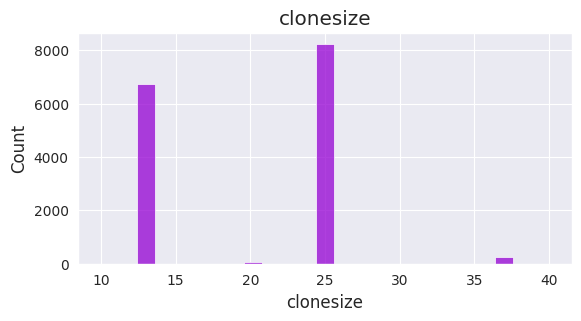

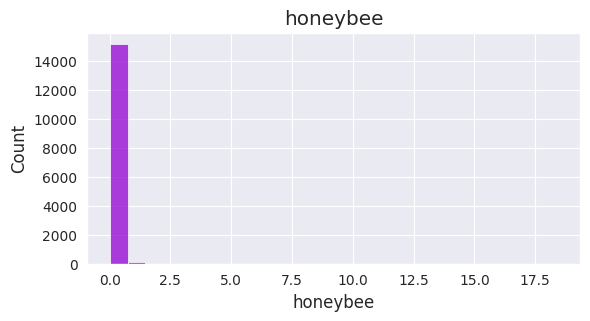

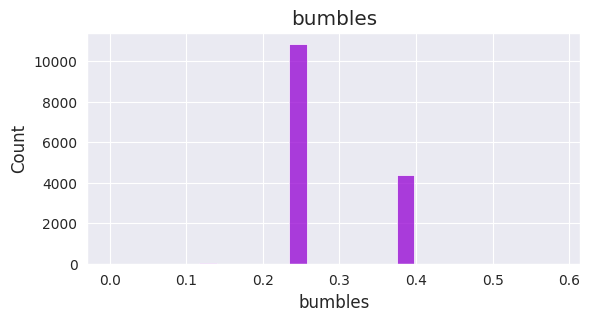

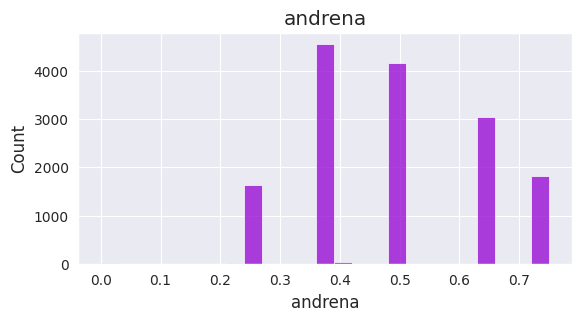

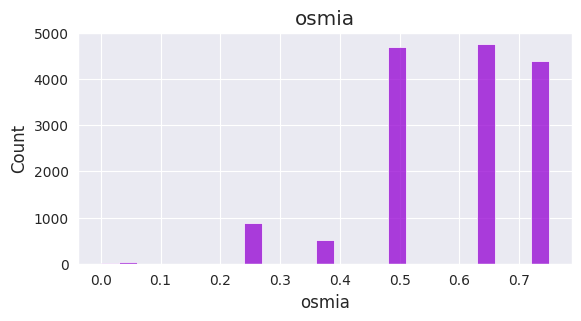

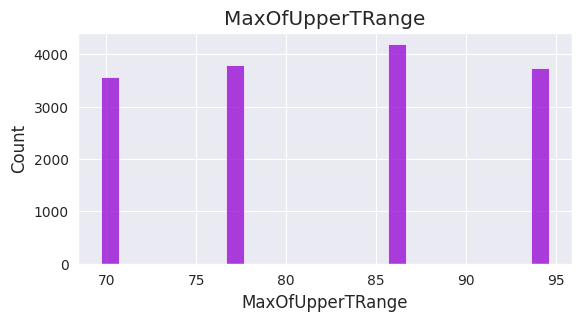

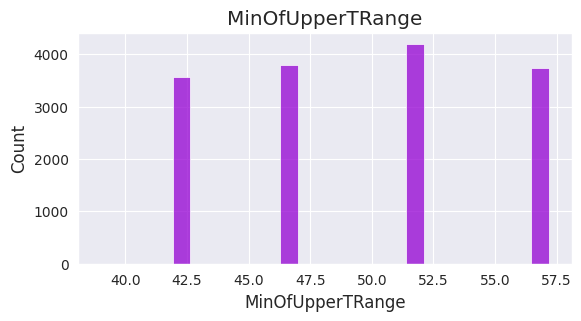

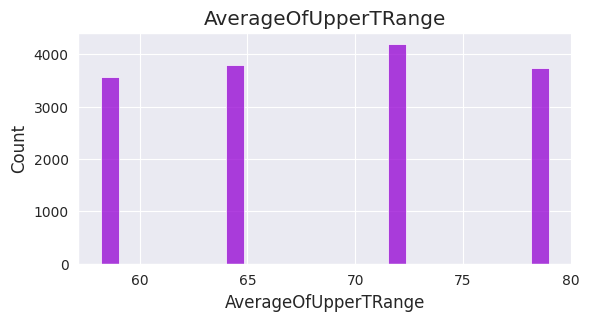

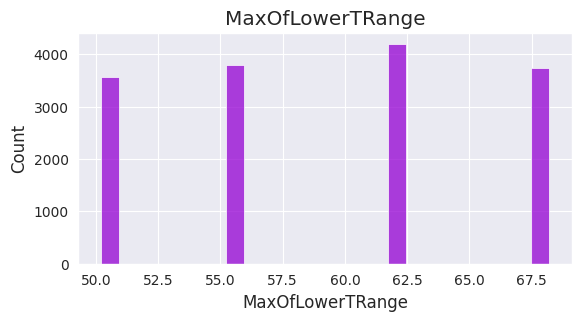

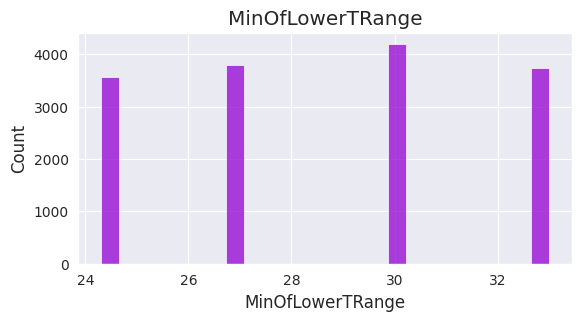

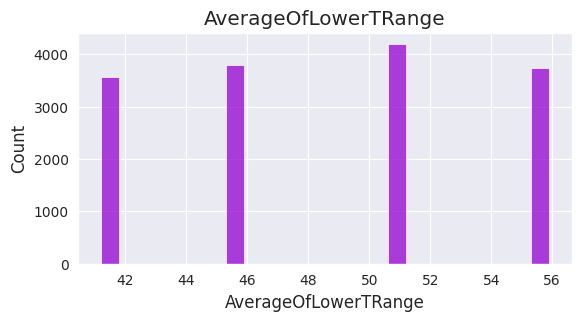

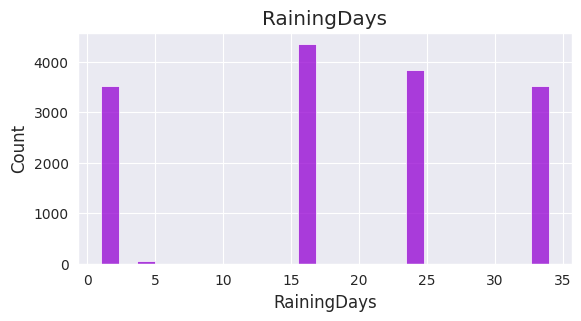

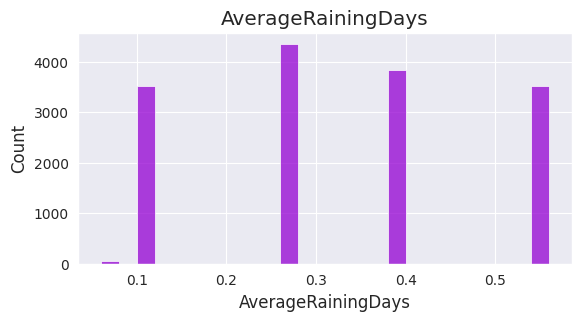

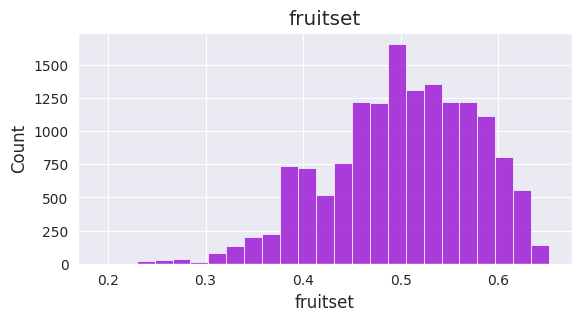

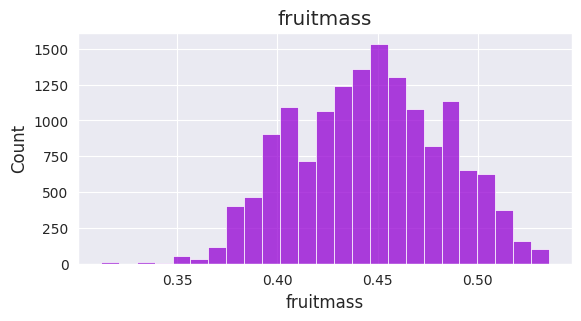

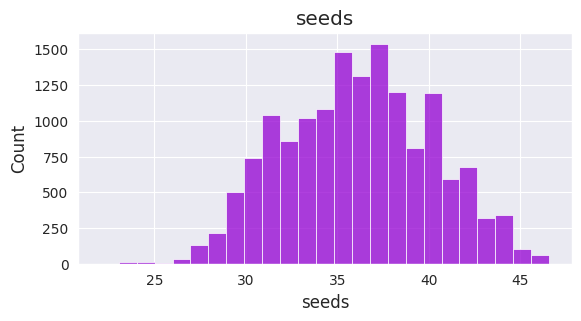

In [ ]:
for i in colms_num:
  plt.subplot(1,2,1)
  sns.histplot(data=df_train, x=df_train[i], bins=25, color='darkviolet')
  plt.title(i)
  plt.savefig(f'./f{i}.png')
  plt.show();

1. Размер клонов черники может повлиять на общий урожай, поскольку более крупные клоны могут давать больше плодов.Можно увидеть на графике, что при значении 25 наблюдается хорошее влияние на урожайность.

2. Если рассматривать второй параметр - плотность пчёл, то,как правило, чем больше плотность популяций пчел в данной местности, тем  более высокий урожай в этом регионе.У каждого вида пчёл в данных есть своё уникальное значение плотности, которое действительно влияет на урожайность черники. Для honeybee это 0.25, 0.5, 0.537, 0.75 для bumbles это 0.117, 0.25, 0.38; для andrena 0.25, 0.38, 0.409,0.5,0.63,0.75, для osmia 0.058,0.25,0.38, 0.5,0.63,0.75.
3. Связь между температурой и урожаем не является прямой и может быть достаточно сложной. MaxOfUpperTRange - максимальный температурный показатель (температурный диапазон). На графике можно увидеть, что при значениях 77.4, 86 урожай будет самым высоким. При значениях 94.6, 69.7 будет меньше (большее отклонение от оптимума). Для MinOfUpperTRange значения 46.8, 52. Для AverageOfUpperTRange 64.7, 71.9. Для MaxOfLowerTRange 55.8, 62. Для MinOfLowerTRange 27, 30. Для AverageOfLowerTRange 45.8, 50.8

Большинство данных являются дискретными, за исключением `seeds`, `fruitmass` and `fruitset`. Возможно, данные фичи можно рассматривать как категориальные.

In [ ]:
def plot_box(df, x, y):
  plt.figure(figsize=(10,5))
  sns.boxplot(data=df, x=x, y=y)
  plt.savefig(f'./boxplot_{x}-{y}.png')
  return plt.show();

In [ ]:
col_box = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
              'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
              'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
              'RainingDays', 'AverageRainingDays']

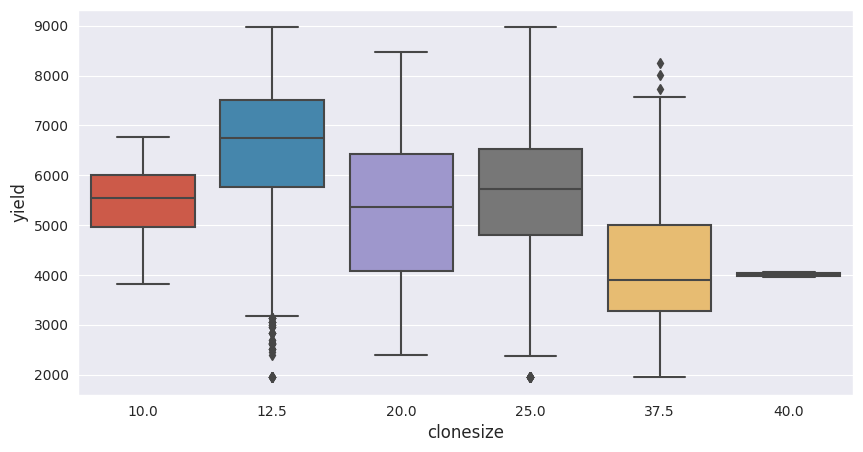

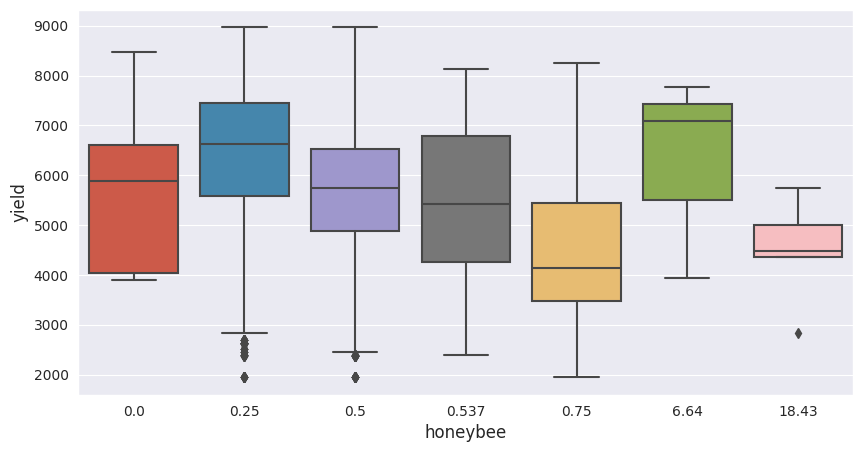

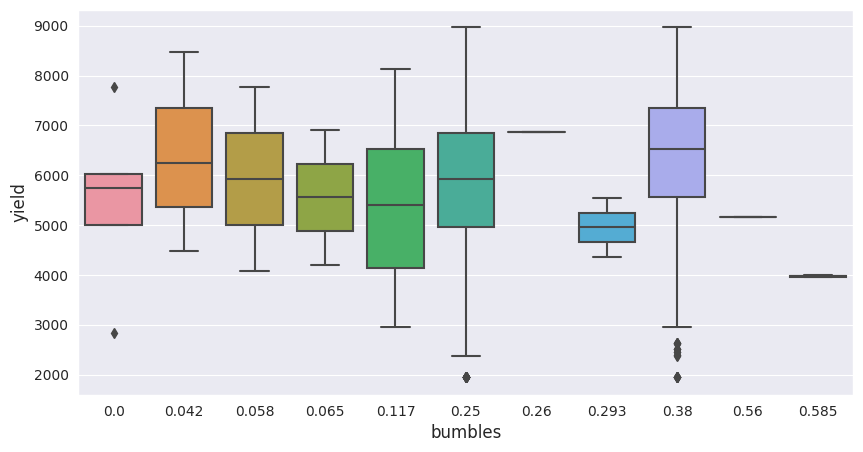

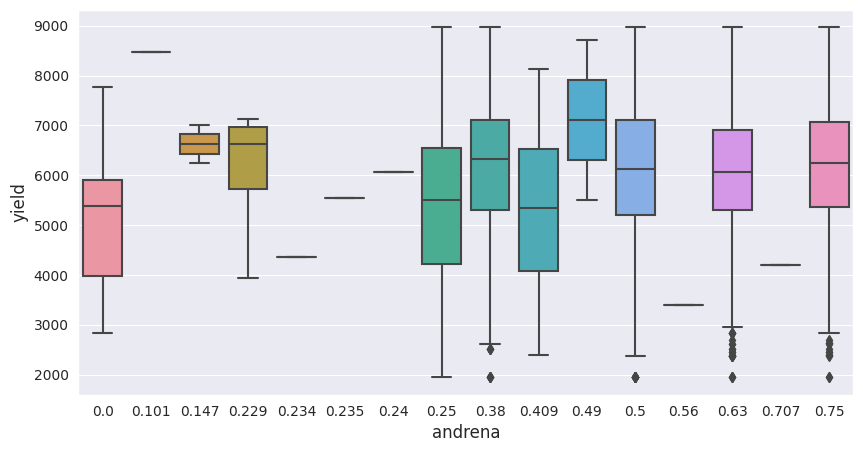

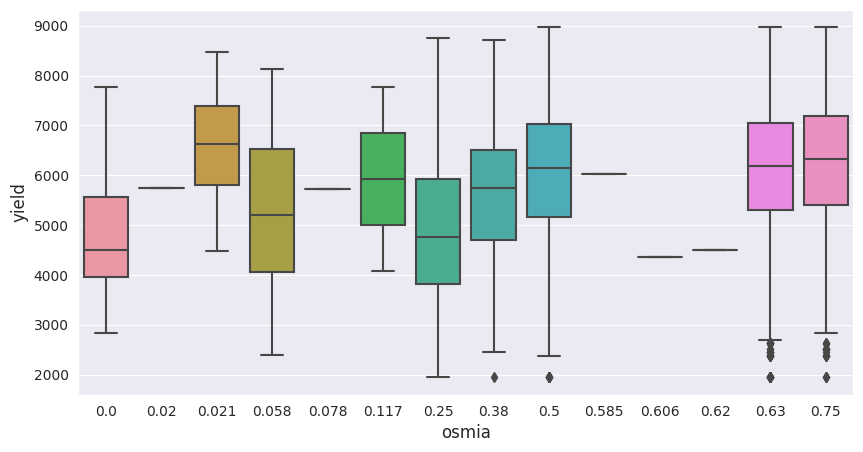

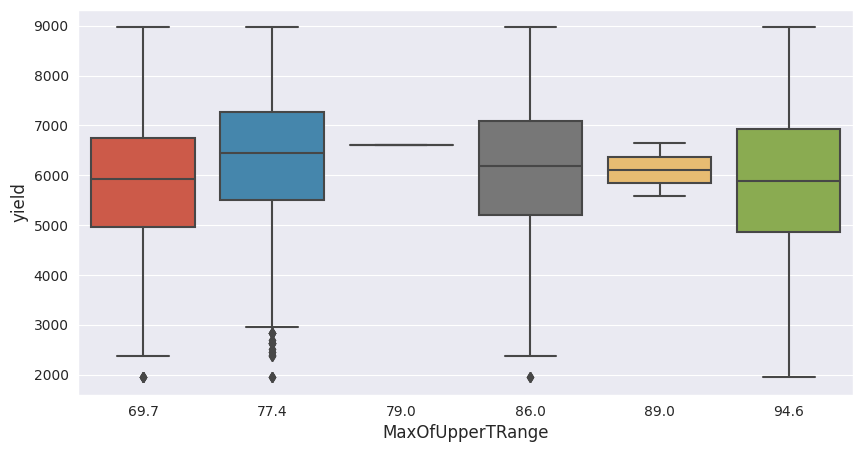

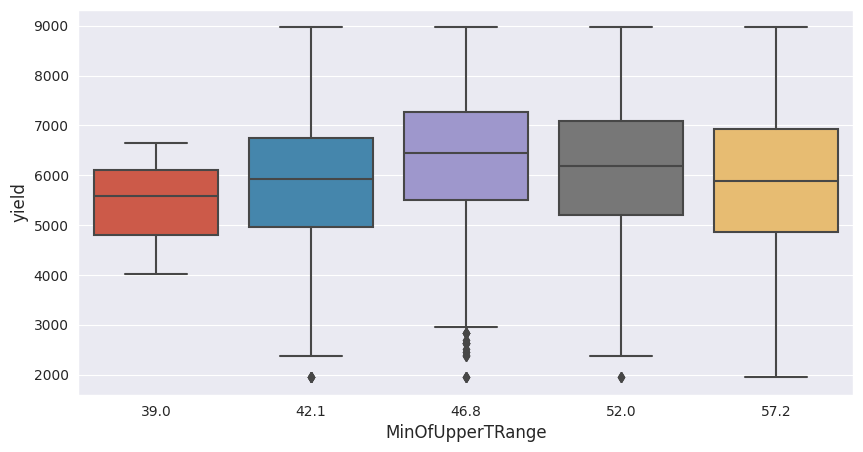

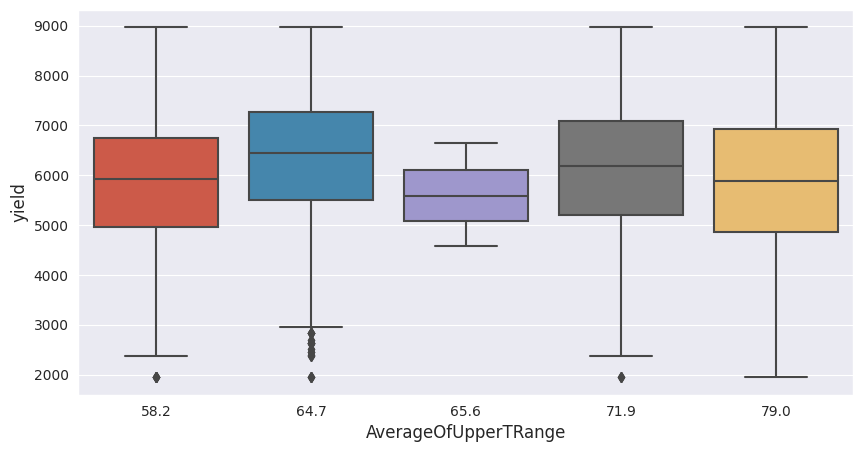

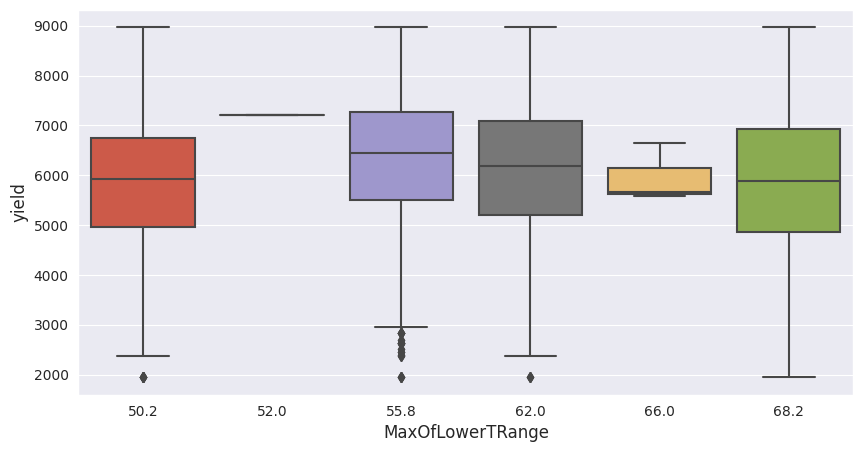

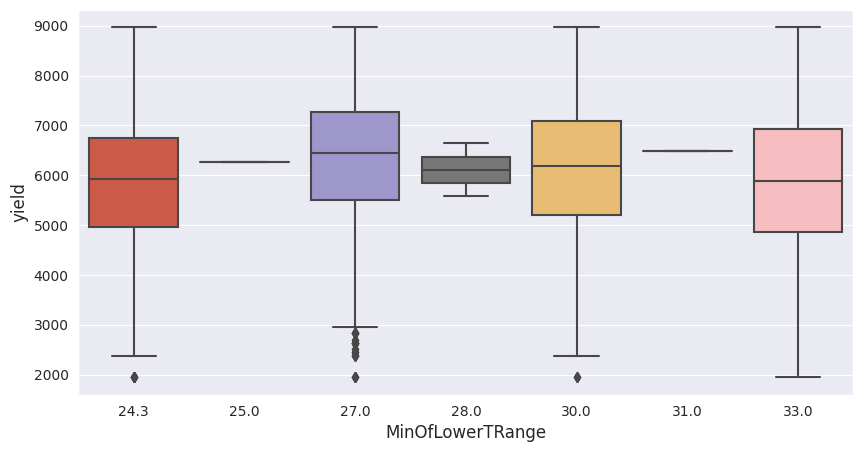

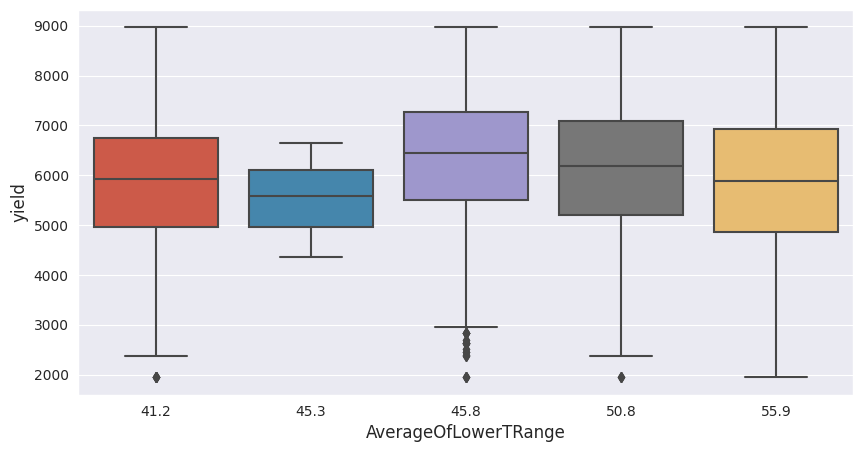

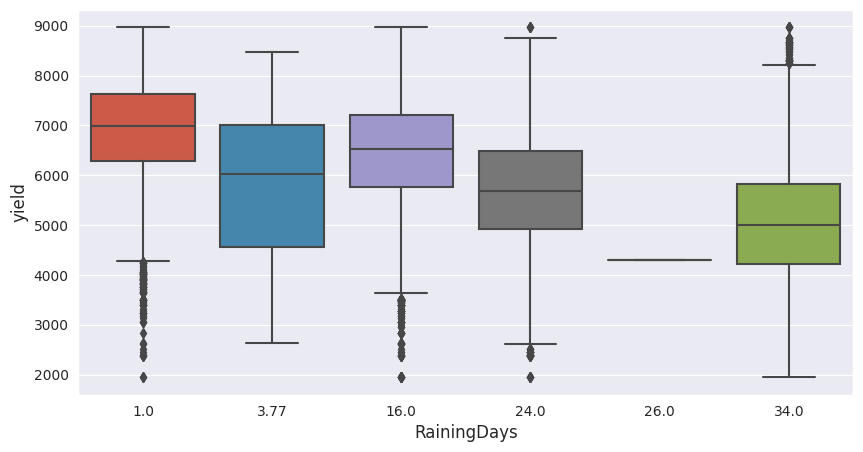

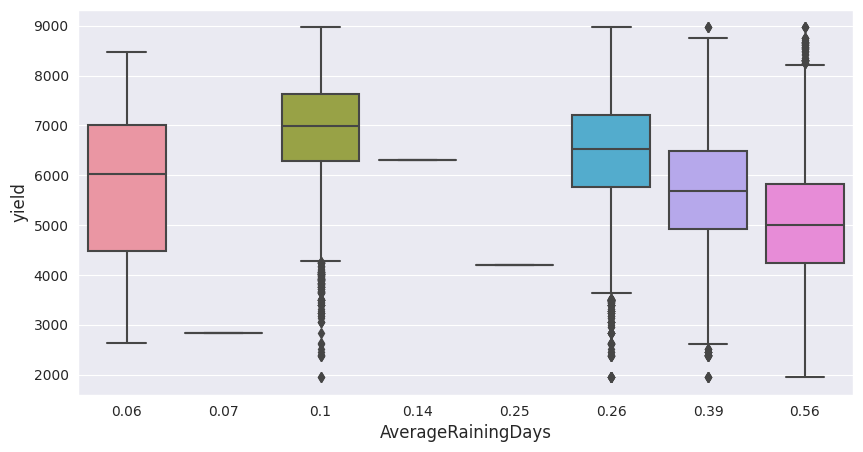

In [ ]:
for i in col_box:
  plot_box(df_train, i, 'yield')

In [ ]:
for i in col_box:
  display(df_train[i].value_counts().to_frame())
  print()
  print('-'*25)
  print()

,clonesize
25.0,8245
12.5,6717
37.5,265
20.0,56
10.0,4
40.0,2



-------------------------



,honeybee
0.500,7832
0.250,7285
0.750,110
0.537,38
0.000,16
18.430,5
6.640,3



-------------------------



,bumbles
0.250,10856
0.380,4376
0.117,39
0.000,5
0.042,3
0.058,2
0.065,2
0.585,2
0.293,2
0.560,1



-------------------------



,andrena
0.380,4565
0.500,4165
0.630,3042
0.750,1828
0.250,1624
0.409,43
0.000,8
0.229,4
0.490,2
0.147,2



-------------------------



,osmia
0.630,4763
0.500,4699
0.750,4387
0.250,872
0.380,509
0.058,42
0.000,6
0.021,4
0.117,2
0.620,1



-------------------------



,MaxOfUpperTRange
86.0,4200
77.4,3788
94.6,3734
69.7,3564
89.0,2
79.0,1



-------------------------



,MinOfUpperTRange
52.0,4200
46.8,3788
57.2,3736
42.1,3562
39.0,3



-------------------------



,AverageOfUpperTRange
71.9,4200
64.7,3787
79.0,3735
58.2,3564
65.6,3



-------------------------



,MaxOfLowerTRange
62.0,4199
55.8,3787
68.2,3736
50.2,3563
66.0,3
52.0,1



-------------------------



,MinOfLowerTRange
30.0,4199
27.0,3787
33.0,3735
24.3,3564
28.0,2
25.0,1
31.0,1



-------------------------



,AverageOfLowerTRange
50.8,4200
45.8,3787
55.9,3735
41.2,3564
45.3,3



-------------------------



,RainingDays
16.00,4361
24.00,3837
34.00,3521
1.00,3521
3.77,48
26.00,1



-------------------------



,AverageRainingDays
0.26,4361
0.39,3837
0.10,3520
0.56,3519
0.06,49
0.25,1
0.07,1
0.14,1



-------------------------



Имеются выбросы

In [ ]:
def plot_scatter(df, x, y):
  plt.figure(figsize=(9,5))
  sns.scatterplot(data=df, x=x, y=y, color='darkviolet')
  plt.savefig(f'./scatterplot_{x}-{y}.png')
  return plt.show();

In [ ]:
def box_density(x):
  f, (ax_box, ax_kde) = plt.subplots(2,1,sharex=True,
                                     gridspec_kw = {'height_ratios': (.15, .85)},
                                     figsize = (10,8))
  sns.boxplot(x=x, ax=ax_box, color='darkviolet')
  ax_box.set(xlabel=None)
  sns.kdeplot(x, fill=True, color='darkviolet')
  ax_box.set_title('Distribution of target (Yield)', fontsize=17)
  ax_kde.set_xlabel('Yield', fontsize=15)
  ax_kde.set_ylabel('Distribution Density', fontsize=15)
  plt.savefig(f'./target.png')
  plt.show();

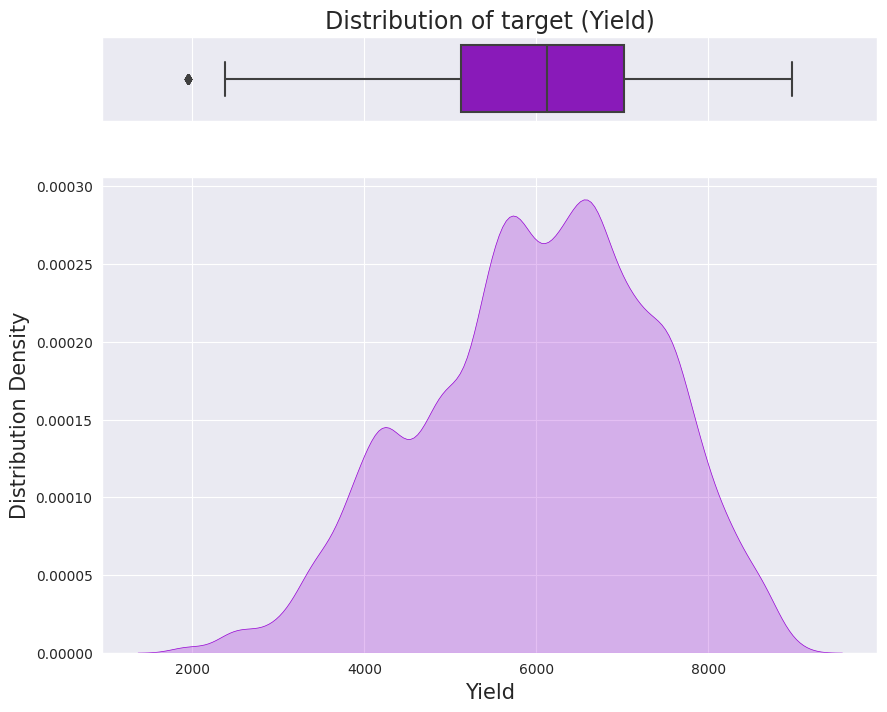

In [ ]:
box_density(df_train['yield'])

In [ ]:
print(df_train['yield'].describe())

count    15289.000000
mean      6025.193999
std       1337.056850
min       1945.530610
25%       5128.163510
50%       6117.475900
75%       7019.694380
max       8969.401840
Name: yield, dtype: float64


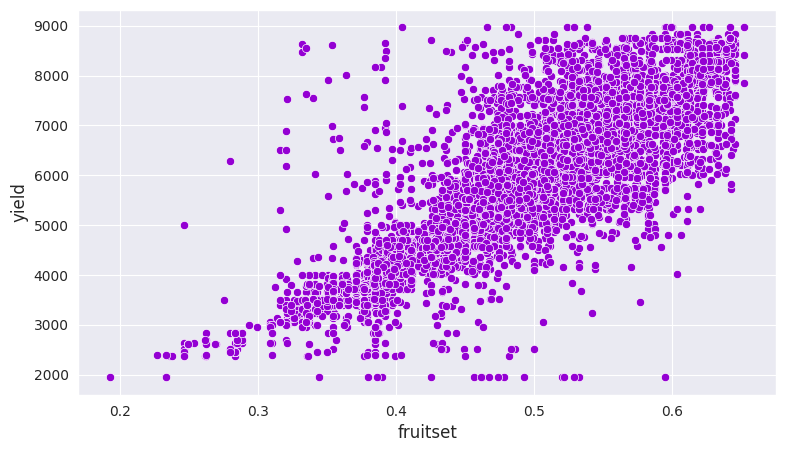

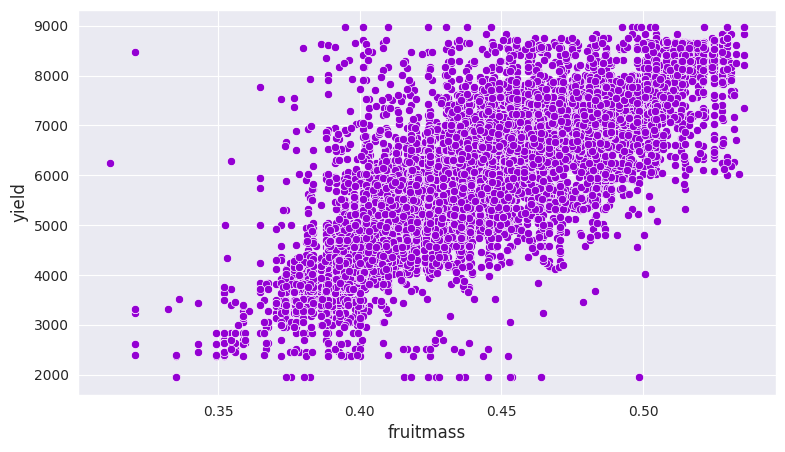

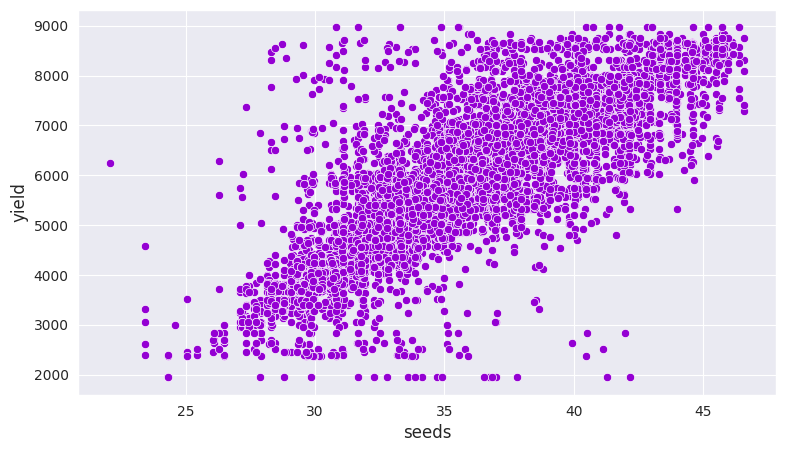

In [ ]:
f_col = ['fruitset','fruitmass','seeds']
for i in f_col:
  plot_scatter(df_train, i, 'yield')

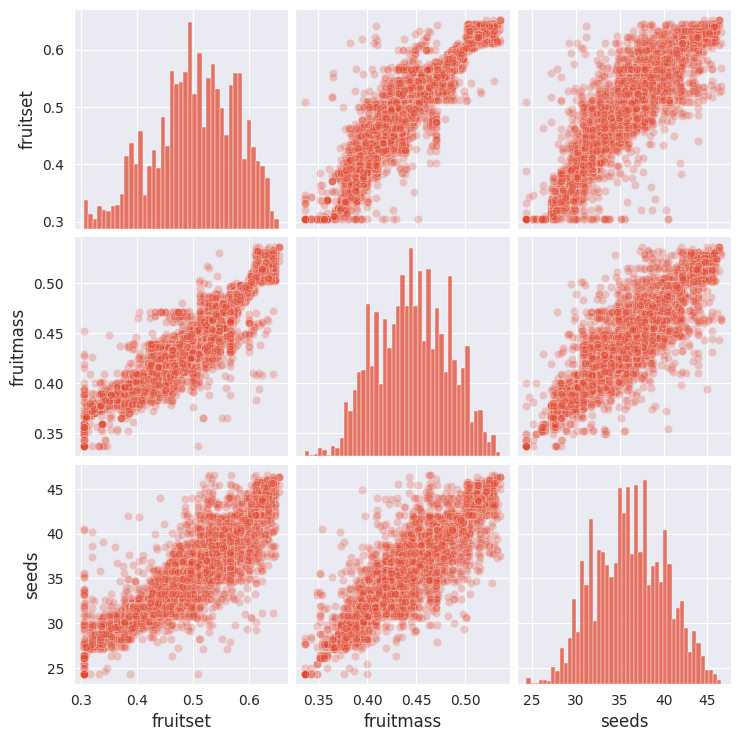

In [ ]:
sns.pairplot(df_train, vars=['fruitset','fruitmass','seeds'],
             plot_kws = {'alpha': 0.25})
plt.savefig(f'./pairplot_num_cols.png')
plt.show();

Можно заметить, что чем больше масса плода и количество семян, тем выше урожайность. Однако, стоит помнить, что влияние массы плода и количества семян на урожайность зависит от многих других факторов, таких как условия выращивания, качество почвы, уровень удобрений и т.д.

## Outliers

In [ ]:
# check for outliers
def outlier_thresholds(data, col_name, q1=0.25, q3=0.75):
  quartile_1 = data[col_name].quantile(q1)
  quartile_3 = data[col_name].quantile(q3)
  c_range = quartile_3 - quartile_1
  up_limit = quartile_3 + 1.5 * c_range
  low_limit = quartile_1 - 1.5 * c_range
  return low_limit, up_limit


def check_out(data, col_name):
  low_limit, up_limit = outlier_thresholds(data, col_name)
  if data[(data[col_name] > up_limit) | (data[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False


def replace_by_thresholds(data, var):
  low_limit, up_limit = outlier_thresholds(data, var)
  data.loc[(data[var] < low_limit), var] = low_limit
  data.loc[(data[var] > up_limit), var] = up_limit

In [ ]:
for i in df_train.columns:
  print(i, check_out(df_train, i))

clonesize False
honeybee True
bumbles True
andrena True
osmia True
MaxOfUpperTRange False
MinOfUpperTRange False
AverageOfUpperTRange False
MaxOfLowerTRange False
MinOfLowerTRange False
AverageOfLowerTRange False
RainingDays True
AverageRainingDays True
fruitset True
fruitmass True
seeds True
yield True


In [ ]:
outliers_colms = ['honeybee','bumbles','andrena','osmia','RainingDays',
                  'AverageRainingDays','fruitset','fruitmass','seeds','yield']
for i in outliers_colms:
  replace_by_thresholds(df_train, i)


for i in df_train.columns:
  print(i, check_out(df_train, i))

clonesize False
honeybee False
bumbles False
andrena False
osmia False
MaxOfUpperTRange False
MinOfUpperTRange False
AverageOfUpperTRange False
MaxOfLowerTRange False
MinOfLowerTRange False
AverageOfLowerTRange False
RainingDays False
AverageRainingDays False
fruitset False
fruitmass False
seeds False
yield False


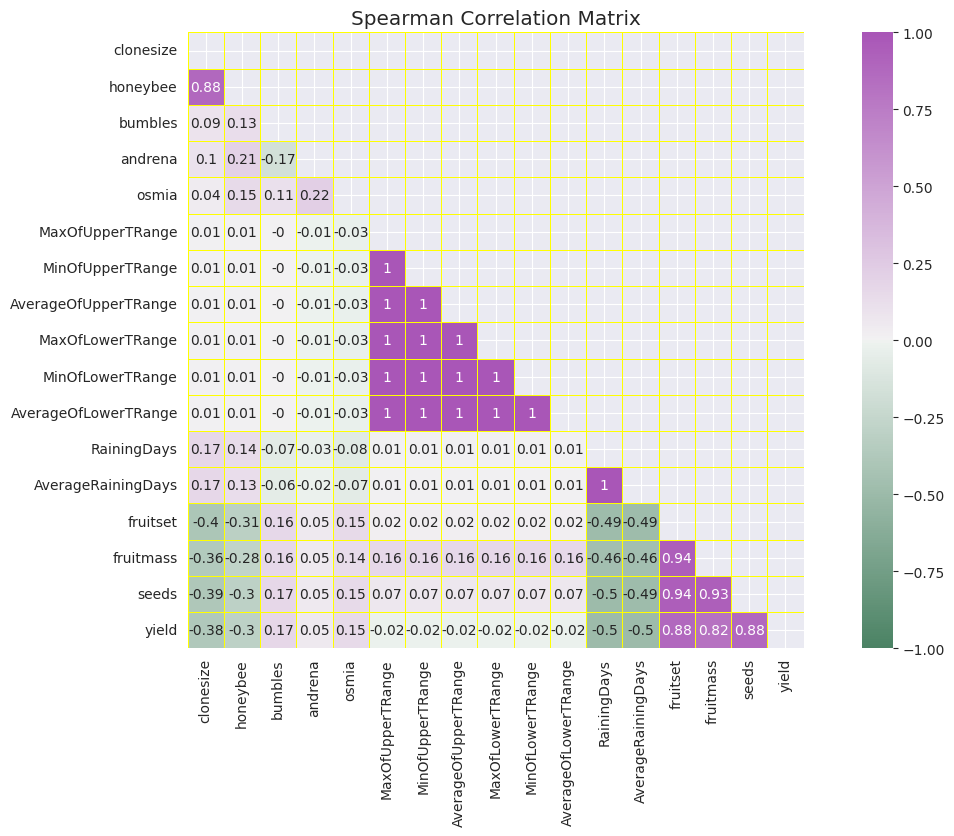

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(method="spearman").round(2), 
            mask=np.triu(np.ones_like(df_train.corr(method="spearman").round(2), dtype=bool)),
            cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
            vmin=-1, 
            vmax=+1,
            center=0,
            linecolor='yellow',
            square=True,
            linewidths=0.5,
            cbar=True,
            annot=True)
plt.title('Spearman Correlation Matrix')
plt.savefig(f'./Spearman_Corr.png')
plt.show();

### Spearman Correlation

* `RainingDays` данные коррелируют друг с другом, следовательно одна или несколько из них могут быть удалены..
* `yield`  имеет сильную положительную корреляцию с `fruitset`, `fruitmass`, and `seeds`. Также `yield` имеет сильную отрицательную корреляцию с `clonesize`, `honeybee`, `RainingDays` и `AverageRainingDays`.
* Количество дождливых дней `RainingDays` отрицательно коррелирует с `fruitset`, `fruitmass`, `seeds` и `yield`. Это говорит о том, что недостаточное количество осадков приводит к низкому урожаю.

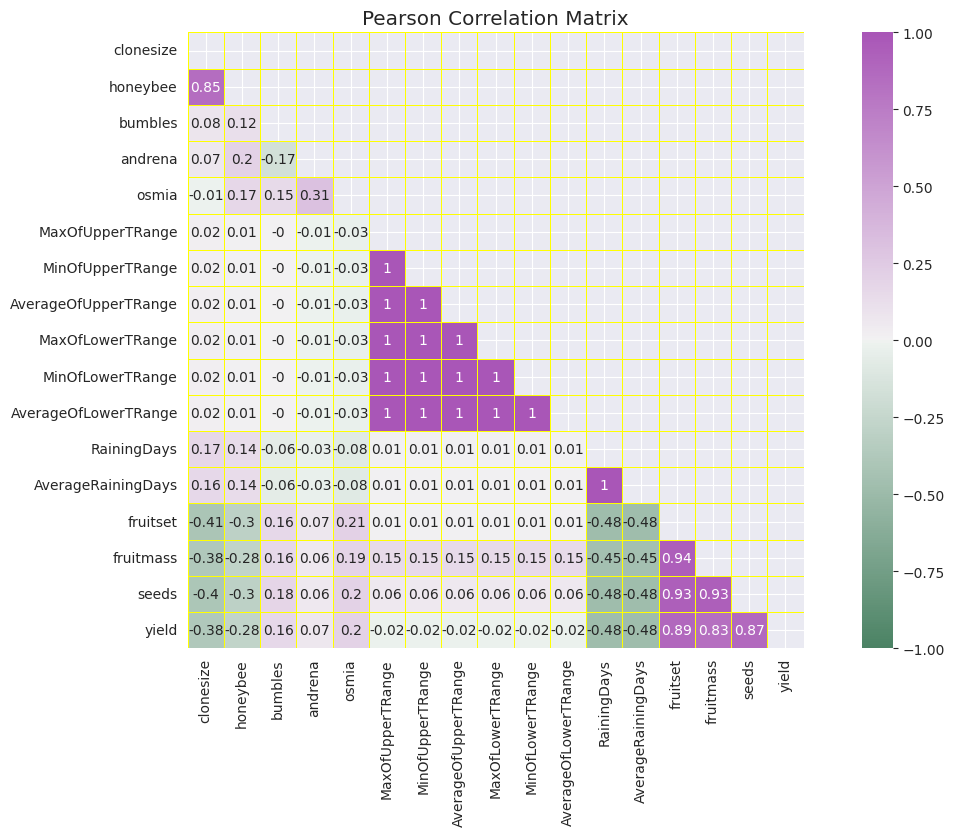

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(method="pearson").round(2), 
            mask=np.triu(np.ones_like(df_train.corr(method="pearson").round(2), dtype=bool)),
            cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
            vmin=-1, 
            vmax=+1,
            center=0,
            linecolor='yellow',
            square=True,
            linewidths=0.5,
            cbar=True,
            annot=True)
plt.title('Pearson Correlation Matrix')
plt.savefig(f'./Pearson_Corr.png')
plt.show();

1. В данном случае, можно наблюдать взаимосвязи между параметрами, отвечающими за температурный диапазон.

2. Вид пчёл `honeybee` коррелирует с размером клона (чем больше размер клона черники, тем больше вероятность опыления этим видом пчёл). Но наблюдается сильно отрицательная корреляция между размером клона и fruitmass, seeds, `yield`,`fruitset` (чем больше клон, тем меньше масса плода, семян, урожая и знаечение параметра `fruitset` (отношение цветков к плодам)).

3. `fruitset` хорошо взаимодействкет с такими параметрами: `fruitmass`, `seeds` и `yield`; fruitmass с `seeds` и `yield` (чем больше масса плода, тем больше семян и урожая); `seeds` с `yield` (чем больше семян, тем больше образуется урожая)

4. Можно также заметить сильно отрицательную корреляцию между видом пчёл `honeybee` и `fruitmass`, `seeds`, `yield`, `fruitset`.

# Feature Engeneering

Temperature range: Вместо того чтобы использовать верхний и нижний температурные диапазоны отдельно, мы могли бы создать новую фичу для дневного температурного диапазона (верхний - нижний). Это могло бы помочь уловить влияние колебаний температуры на опыления и `yield`.

Total bee density: Создадим фичу общей плотности пчел. Это могло бы помочь зафиксировать совокупное влияние всех видов пчел на опыление и `yield`.

Bee species dominance: Рассчитаем долю каждого вида пчел, что поможет определить важность каждого вида пчел в опылении.

Rain intensity: Расчет среднесуточного количества осадков в течение сезона цветения. Это могло бы дать более точное представление о количестве воды в период цветения.

In [ ]:
total_density_train = df_train['honeybee'] + df_train['bumbles'] + df_train['andrena'] + df_train['osmia']

df_train['TempRange'] = df_train['MaxOfUpperTRange'] - df_train['MinOfLowerTRange']
df_train['TotalBeeDens'] = df_train['honeybee'] + df_train['bumbles'] + df_train['andrena'] + df_train['osmia']
df_train['HoneybeeDominance'] = df_train['honeybee'] / total_density_train
df_train['BumblesBeeDominance'] = df_train['bumbles'] / total_density_train
df_train['AndrenaBeeDominance'] = df_train['andrena'] / total_density_train
df_train['OsmiaBeeDominance'] = df_train['osmia'] / total_density_train
df_train['RainIntensity'] = df_train['AverageRainingDays'] / df_train['RainingDays']

# P-Value Testing

Воспользуемся p-value, чтобы определить, оказывают ли фичи влияние на модель. 

Наша нулевая гипотеза заключается в том, что влияют ли фичи на целевую переменную. Если p > 0.05, то отвергаем гипотезу и потенциально можем удалить фичу.

*Этот метод не гарантирует точность

In [ ]:
train = df_train.copy()

x = add_constant(train.drop(['yield'], axis=1))
ml = OLS(train['yield'], x).fit()
p_vls = pd.DataFrame(ml.pvalues)
p_vls.reset_index(inplace=True)
p_vls.rename(columns={0: 'p_value', 'index': 'features'}, inplace=True)
p_vls.style.background_gradient(cmap='coolwarm')

,features,p_value
0,const,0.000000
1,clonesize,0.036689
2,honeybee,0.847070
3,bumbles,0.007128
4,andrena,0.336526
5,osmia,0.027045
6,MaxOfUpperTRange,0.000007
7,MinOfUpperTRange,0.124418
8,AverageOfUpperTRange,0.001229
9,MaxOfLowerTRange,0.637261


# Building Model

In [ ]:
colms_to_cat = ['bumbles', 'osmia',
              'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
              'MinOfLowerTRange', 'AverageOfLowerTRange',
              'RainingDays', 'AverageRainingDays', 'TempRange']

In [ ]:
X = df_train.drop(['yield', 'clonesize', 'honeybee', 'MaxOfLowerTRange', 'andrena','AndrenaBeeDominance'], axis=1)
y = df_train['yield']

In [ ]:
for i in colms_to_cat:
  X[i] = X[i].astype('category')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((12231, 18), (2446, 18), (612, 18))

In [ ]:
def get_preprocessed(train, val, test):
  rob_sc = StandardScaler()
  train = rob_sc.fit_transform(train)
  val = rob_sc.transform(val)
  test = rob_sc.transform(test)
  return train, val, test

In [ ]:
def show_metrics(true, preds, name_model, title):
  r2 = r2_score(true, preds)
  mae = mean_absolute_error(true, preds)
  rmse = np.sqrt(mean_absolute_error(true, preds))
  print(title)
  print(f'The accuracy of the {name_model} by R2 is {round(r2,2)*100}%\nMAE of the {name_model} is {round(mae,2)}\nRMSE of the {name_model} is {round(rmse,2)}')

In [ ]:
def plot_important_features(ft_import, names, model):
  f_importance = np.array(ft_import)
  f_names = np.array(names)
  d = {'feature_importance': f_importance, 'feature_names': f_names}
  df = pd.DataFrame(d)
  df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
  plt.figure(figsize=[10,8])
  sns.barplot(x=df['feature_importance'], y=df['feature_names'], palette='RdBu')
  plt.ylabel('Feature Names')
  plt.xlabel('Feature Importance, %')
  plt.title(f'Feature Importance of {model} Model')
  plt.show();

In [ ]:
X_train, X_val, X_test = get_preprocessed(X_train, X_val, X_test)

### LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicton_val = linear_model.predict(X_val)
show_metrics(y_val, predicton_val, 'LinearRegression', 'Validation Data')

Validation Data
The accuracy of the LinearRegression by R2 is 81.0%
MAE of the LinearRegression is 366.8
RMSE of the LinearRegression is 19.15


In [ ]:
predicton_test = linear_model.predict(X_test)
show_metrics(y_test, predicton_test, 'LinearRegression', 'Test Data')

Test Data
The accuracy of the LinearRegression by R2 is 81.0%
MAE of the LinearRegression is 377.28
RMSE of the LinearRegression is 19.42


In [ ]:
def show_distribution_y_pred(y, preds, title):
  plt.title(title)
  sns.distplot(y, hist=False, color='green')
  sns.distplot(preds, hist=False, color='red')
  plt.show();

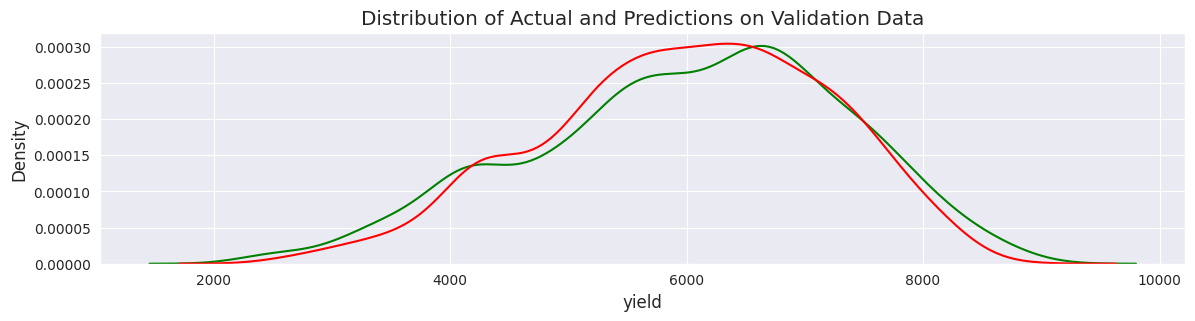

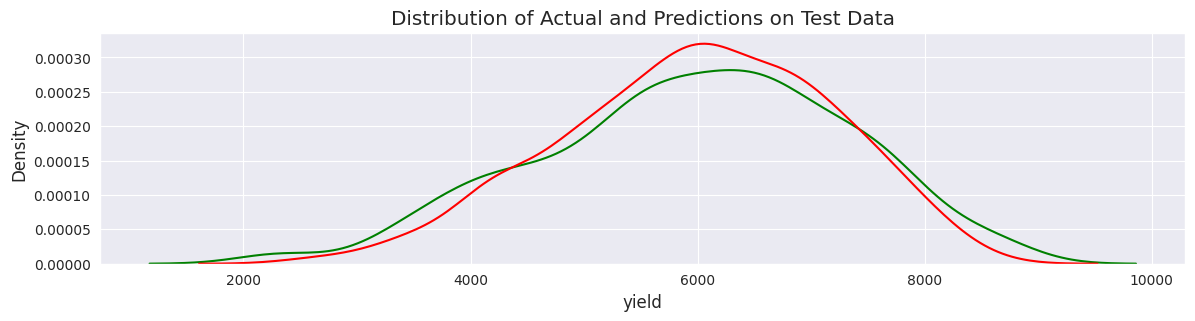

In [ ]:
show_distribution_y_pred(y_val, predicton_val, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test, 'Distribution of Actual and Predictions on Test Data')

### Lasso

In [ ]:
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train, y_train)
prediction_val_lasso = lasso_reg.predict(X_val)
prediction_test_lasso = lasso_reg.predict(X_test)

In [ ]:
show_metrics(y_val, prediction_val_lasso, 'CatBoostRegressor', 'Validation Data')

Validation Data
The accuracy of the CatBoostRegressor by R2 is 81.0%
MAE of the CatBoostRegressor is 366.86
RMSE of the CatBoostRegressor is 19.15


In [ ]:
show_metrics(y_test, prediction_test_lasso, 'CatBoostRegressor', 'Test Data')

Test Data
The accuracy of the CatBoostRegressor by R2 is 81.0%
MAE of the CatBoostRegressor is 378.82
RMSE of the CatBoostRegressor is 19.46


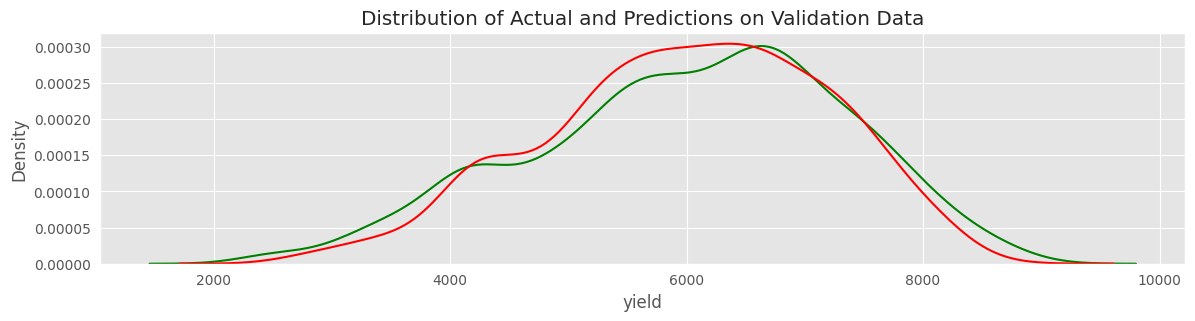

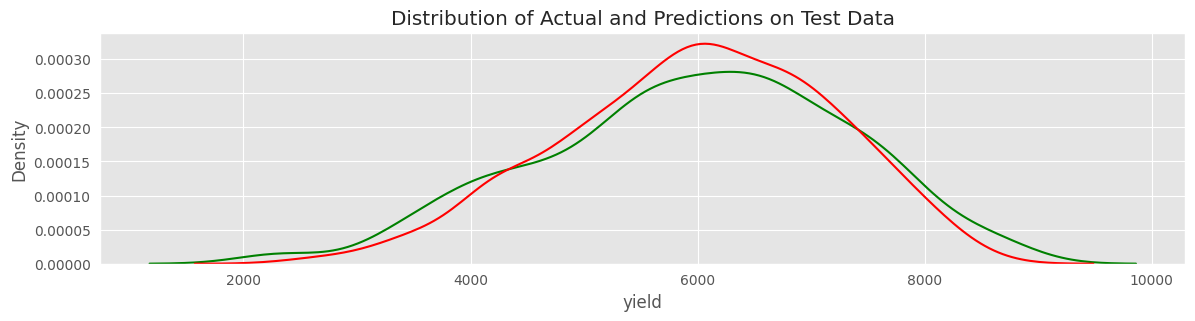

In [ ]:
show_distribution_y_pred(y_val, prediction_val_lasso, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, prediction_test_lasso, 'Distribution of Actual and Predictions on Test Data')

### CatBoostRegressor

In [ ]:
model_cat = CatBoostRegressor().fit(X_train, y_train)

In [ ]:
predicton_val_cat = model_cat.predict(X_val)
show_metrics(y_val, predicton_val_cat, 'CatBoostRegressor', 'Validation Data')

Validation Data
The accuracy of the CatBoostRegressor by R2 is 82.0%
MAE of the CatBoostRegressor is 353.2
RMSE of the CatBoostRegressor is 18.79


In [ ]:
predicton_test_cat = model_cat.predict(X_test)
show_metrics(y_test, predicton_test_cat, 'CatBoostRegressor', 'Test Data')

Test Data
The accuracy of the CatBoostRegressor by R2 is 82.0%
MAE of the CatBoostRegressor is 360.25
RMSE of the CatBoostRegressor is 18.98


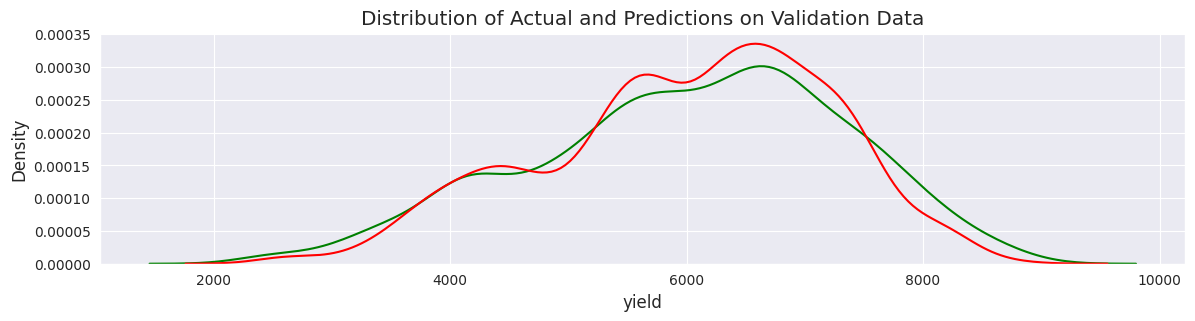

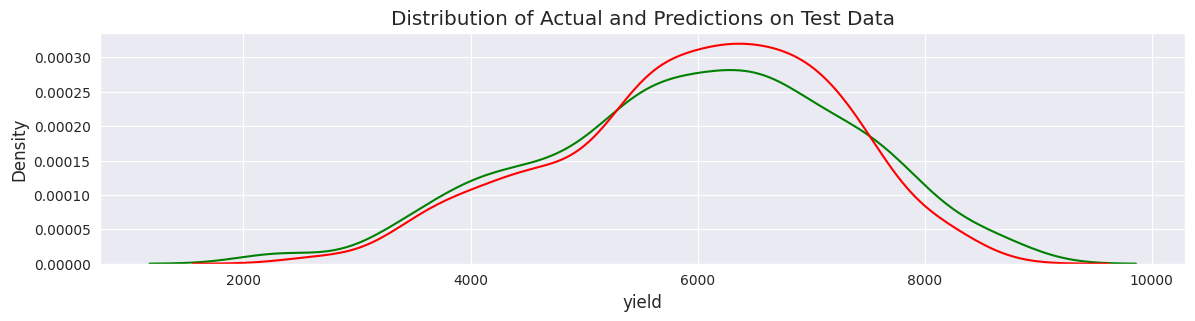

In [ ]:
show_distribution_y_pred(y_val, predicton_val_cat, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test_cat, 'Distribution of Actual and Predictions on Test Data')

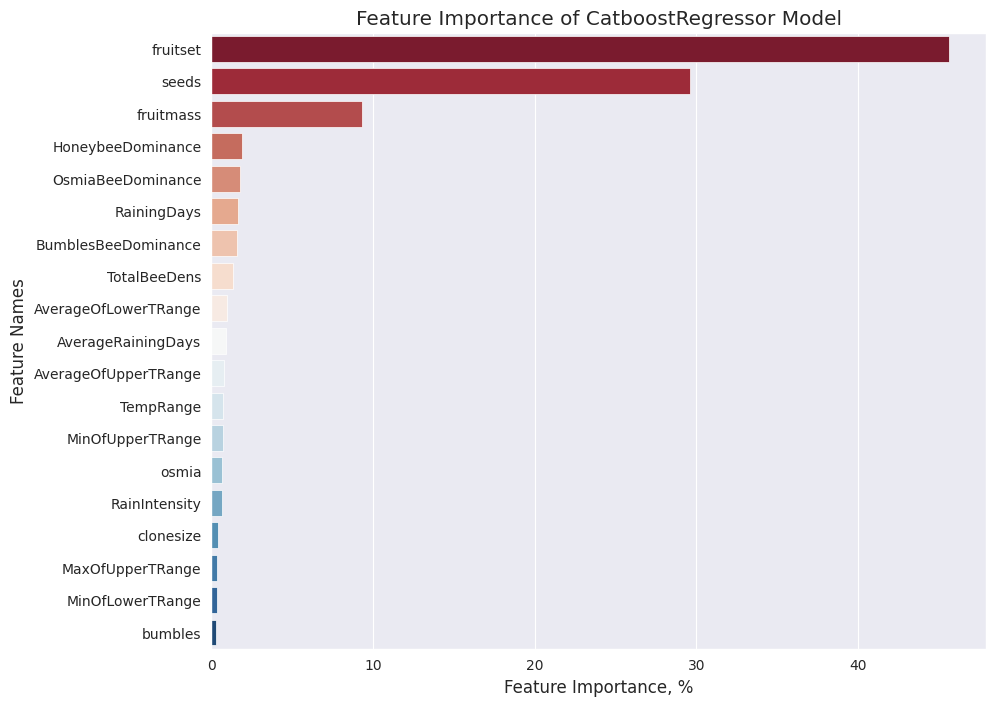

In [ ]:
plot_important_features(model_cat.feature_importances_, X.columns, 'CatboostRegressor')

# Fine-Tuning

In [ ]:
model_params = {

    'catboost_regression': {
        'model': CatBoostRegressor(),
        'params': {
            'iterations': [1000, 1500],
            'learning_rate': [0.01, 0.1],
            'depth': [6, 7, 16],
            'l2_leaf_reg': [0, 0.01, 0.1],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bylevel': [0.5, 0.7, 0.9],
            'random_strength': [0.05, 0.1, 0.2],
            'loss_function': ['MAE'],
            'verbose': [False],
            'grow_policy': ["Lossguide"]
        }
    },

    'lgbm_regression': {
        'model': lgb.LGBMRegressor(),
        'params': {
            'n_estimators': [1000, 1500],
            'learning_rate': [0.01, 0.1],
            'max_depth': [5, 6, 7],
            'min_child_weight': [5, 15, 20],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'reg_alpha': [0, 0.1, 0.2, 0.3, 1],
            'reg_lambda': [0, 0.1, 0.2, 0.3, 1],
            'num_leaves': [12, 20, 32, 64],
            'objective': ["mae"],
            'force_col_wise': [True],
        }
    },

    'xgbboost_regression': {
        'model': xgb.XGBRegressor(),
        'params': {
             'n_estimators': [1000, 1500],
             'learning_rate': [0.01, 0.1],
             'max_depth': [5, 6, 7],
             'min_child_weight': [5, 10, 20],
             'subsample': [0.5, 0.7, 0.9],
             'colsample_bytree': [0.5, 0.7, 0.9],
             'gamma': [0, 0.1, 0.2, 1],
             'reg_alpha': [0, 0.1, 0.2, 1],
             'reg_lambda': [0, 0.1, 0.2, 1],
             'objective': ['reg:squarederror', 'reg:pseudohubererror'],
             'eval_metric': ['mae'],
        }
    },
    'gradientboost_regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [250, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5, 6],
            'min_samples_split': [2, 5, 10, 16],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': [1.0, 'sqrt', 'log2'],
            'subsample': [0.5, 0.7, 0.9, 1.0],
            'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
            'alpha': [0.1, 0.5, 0.9]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo, mp, in model_params.items():
  gs = RandomizedSearchCV(mp['model'], param_distributions=mp['params'], cv=cv, return_train_score=False)
  gs.fit(X_train, y_train)
  scores.append({
      'model': algo,
      'best_score': gs.best_score_,
      'best_params': gs.best_params_
  })
  best_estimators[algo] = gs.best_estimator_

df_models = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [ ]:
df_models

,model,best_score,best_params
0,catboost_regression,0.822452,"{'verbose': False, 'subsample': 0.5, 'random_s..."
1,lgbm_regression,0.821932,"{'subsample': 0.5, 'reg_lambda': 0.3, 'reg_alp..."
2,xgbboost_regression,0.823323,"{'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha..."
3,gradientboost_regression,0.821417,"{'subsample': 0.9, 'n_estimators': 500, 'min_s..."


In [ ]:
best_reg1 = best_estimators['catboost_regression']
best_reg2 = best_estimators['lgbm_regression']
best_reg3 = best_estimators['xgbboost_regression']
best_reg4 = best_estimators['gradientboost_regression']

#### CatBoostRegressor

In [ ]:
predicton_val_best_reg1 = best_reg1.predict(X_val)
show_metrics(y_val, predicton_val_best_reg1, 'CatBoostRegressor', 'Validation Data')

Validation Data
The accuracy of the CatBoostRegressor by R2 is 83.0%
MAE of the CatBoostRegressor is 334.13
RMSE of the CatBoostRegressor is 18.28


In [ ]:
predicton_test_best_reg1 = best_reg1.predict(X_test)
show_metrics(y_test, predicton_test_best_reg1, 'CatBoostRegressor', 'Test Data')

Test Data
The accuracy of the CatBoostRegressor by R2 is 82.0%
MAE of the CatBoostRegressor is 346.42
RMSE of the CatBoostRegressor is 18.61


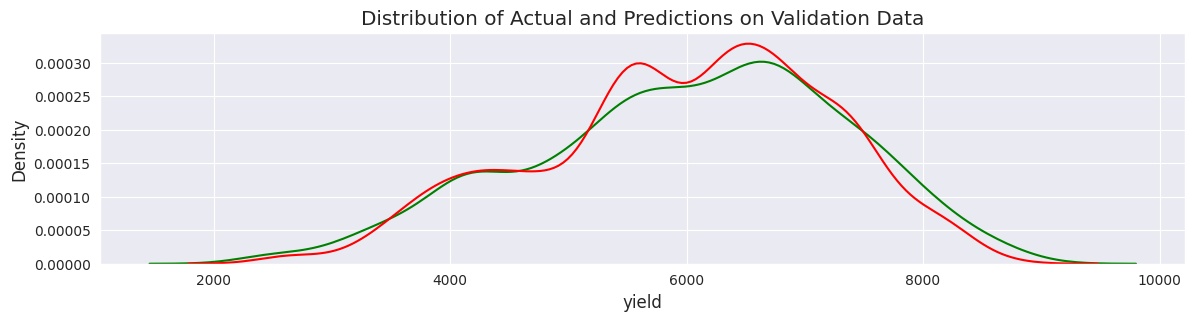

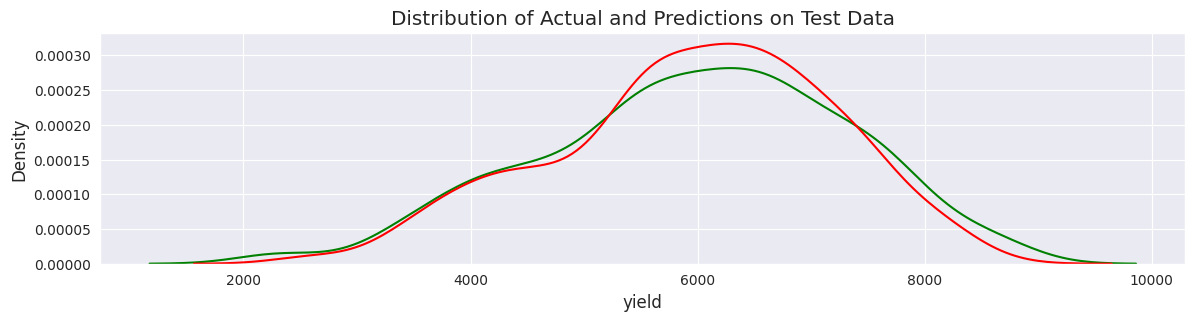

In [ ]:
show_distribution_y_pred(y_val, predicton_val_best_reg1, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test_best_reg1, 'Distribution of Actual and Predictions on Test Data')

#### LightGBMRegression

In [ ]:
predicton_val_best_reg2 = best_reg2.predict(X_val)
show_metrics(y_val, predicton_val_best_reg2, 'LightGBMRegression', 'Validation Data')

Validation Data
The accuracy of the LightGBMRegression by R2 is 83.0%
MAE of the LightGBMRegression is 336.6
RMSE of the LightGBMRegression is 18.35


In [ ]:
predicton_test_best_reg2 = best_reg2.predict(X_test)
show_metrics(y_test, predicton_test_best_reg2, 'LightGBMRegression', 'Test Data')

Test Data
The accuracy of the LightGBMRegression by R2 is 82.0%
MAE of the LightGBMRegression is 350.79
RMSE of the LightGBMRegression is 18.73


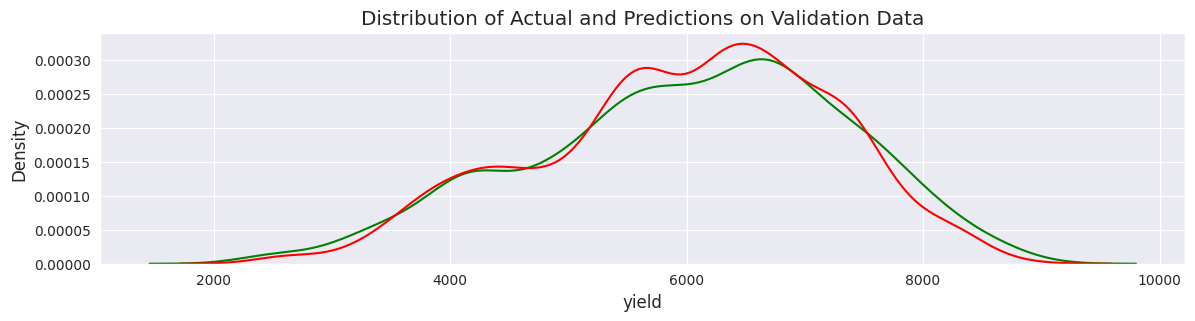

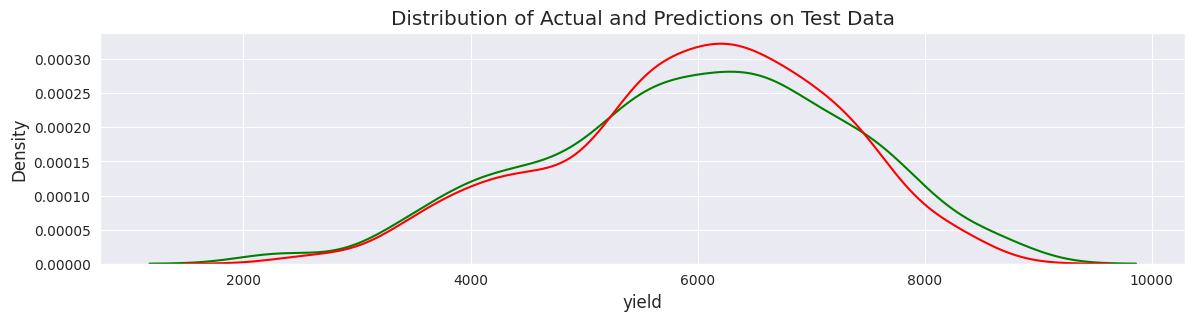

In [ ]:
show_distribution_y_pred(y_val, predicton_val_best_reg2, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test_best_reg2, 'Distribution of Actual and Predictions on Test Data')

#### XGBRegression

In [ ]:
predicton_val_best_reg3 = best_reg3.predict(X_val)
show_metrics(y_val, predicton_val_best_reg3, 'XGBRegression', 'Validation Data')

Validation Data
The accuracy of the XGBRegression by R2 is 83.0%
MAE of the XGBRegression is 344.77
RMSE of the XGBRegression is 18.57


In [ ]:
predicton_test_best_reg3 = best_reg3.predict(X_test)
show_metrics(y_test, predicton_test_best_reg3, 'XGBRegression', 'Test Data')

Test Data
The accuracy of the XGBRegression by R2 is 82.0%
MAE of the XGBRegression is 357.23
RMSE of the XGBRegression is 18.9


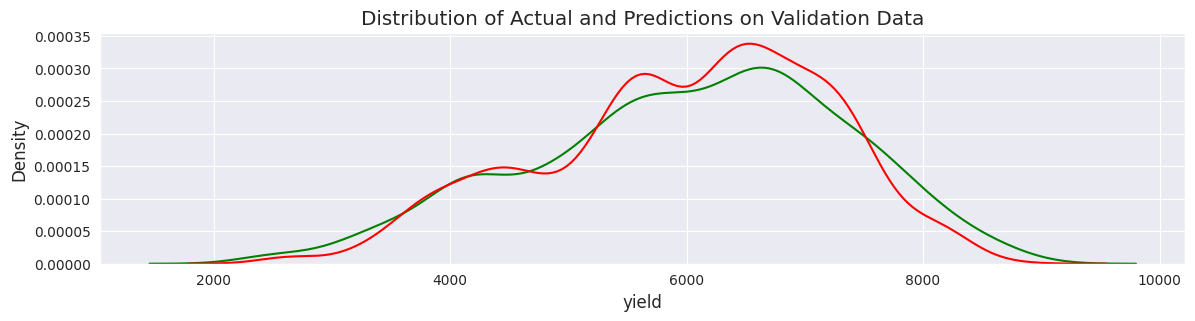

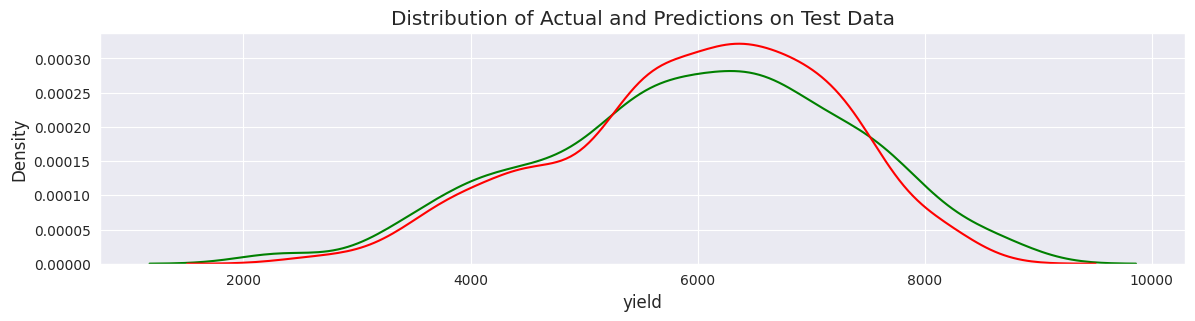

In [ ]:
show_distribution_y_pred(y_val, predicton_val_best_reg3, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test_best_reg3, 'Distribution of Actual and Predictions on Test Data')

#### GradientBoostingRegressor

In [ ]:
predicton_val_best_reg4 = best_reg4.predict(X_val)
show_metrics(y_val, predicton_val_best_reg4, 'GradientBoostingRegressor', 'Validation Data')

Validation Data
The accuracy of the GradientBoostingRegressor by R2 is 83.0%
MAE of the GradientBoostingRegressor is 339.65
RMSE of the GradientBoostingRegressor is 18.43


In [ ]:
predicton_test_best_reg4 = best_reg4.predict(X_test)
show_metrics(y_test, predicton_test_best_reg4, 'GradientBoostingRegressor', 'Test Data')

Test Data
The accuracy of the GradientBoostingRegressor by R2 is 82.0%
MAE of the GradientBoostingRegressor is 352.23
RMSE of the GradientBoostingRegressor is 18.77


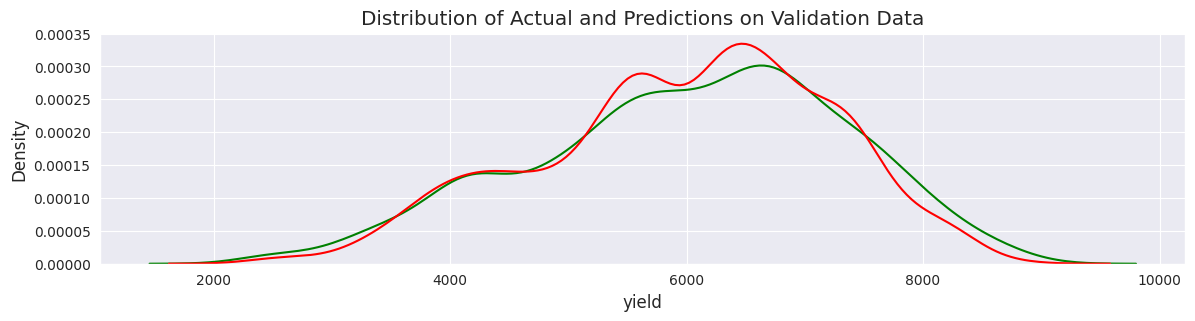

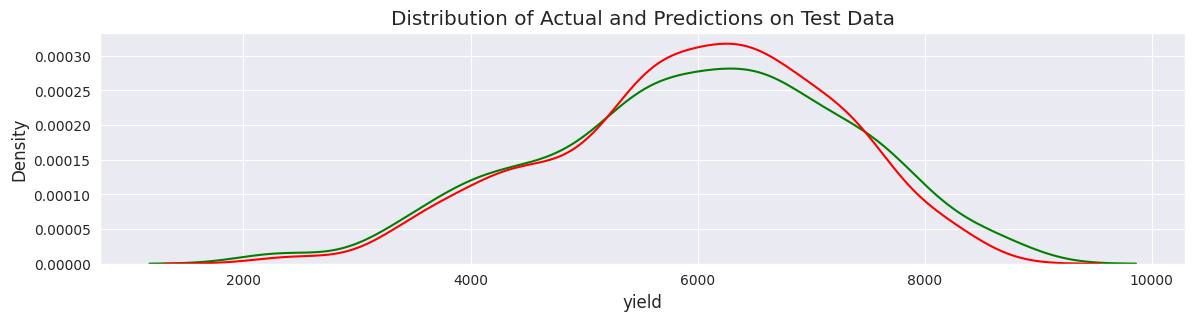

In [ ]:
show_distribution_y_pred(y_val, predicton_val_best_reg4, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, predicton_test_best_reg4, 'Distribution of Actual and Predictions on Test Data')

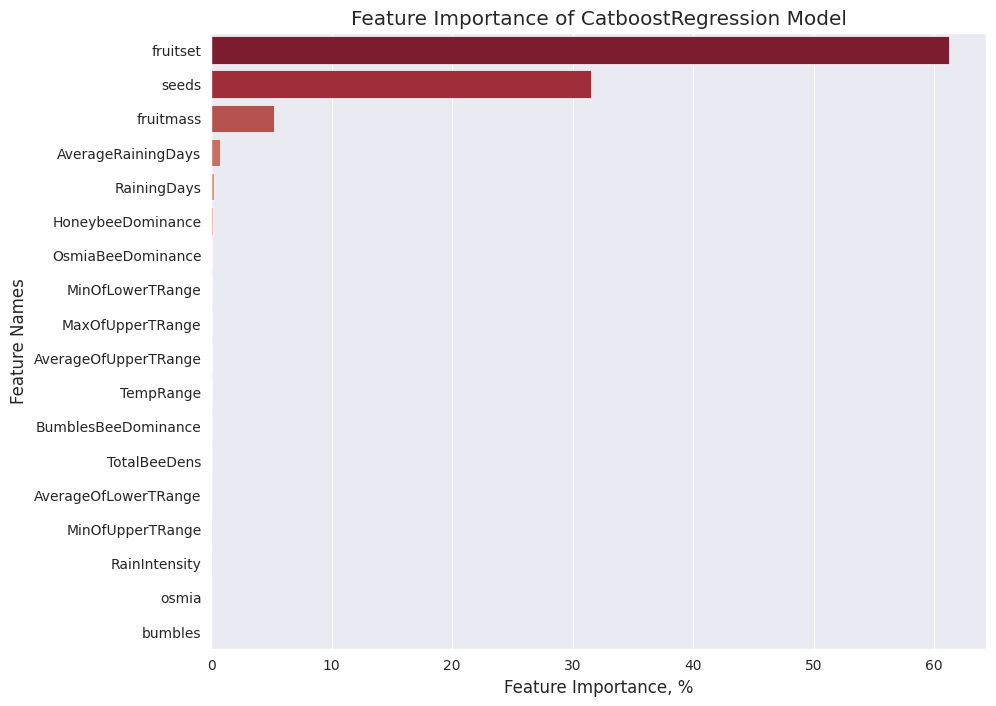

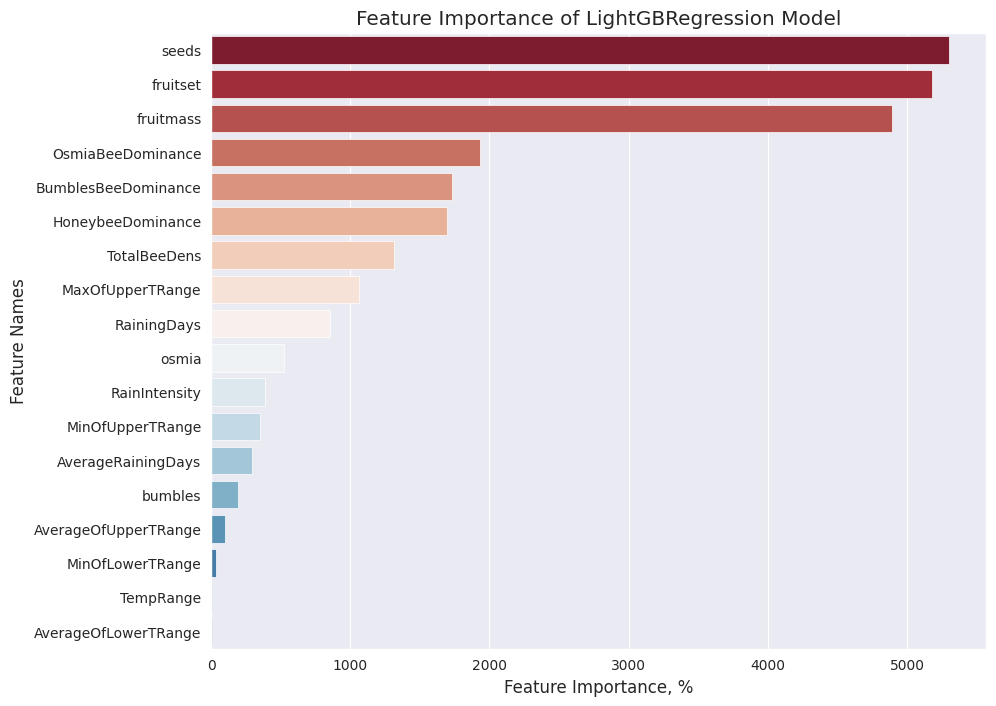

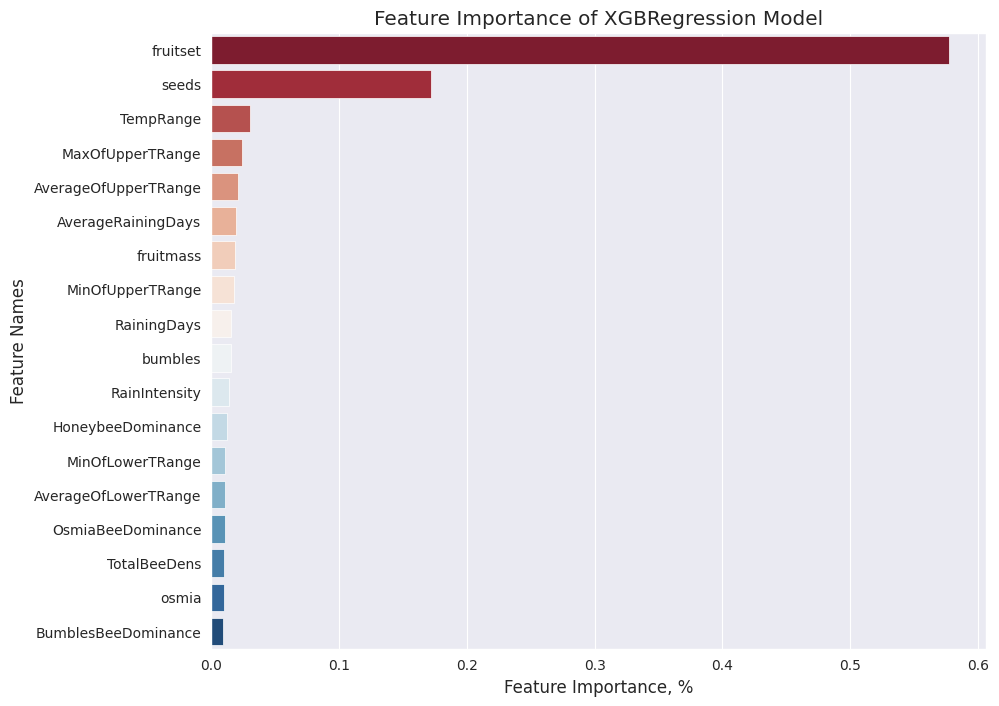

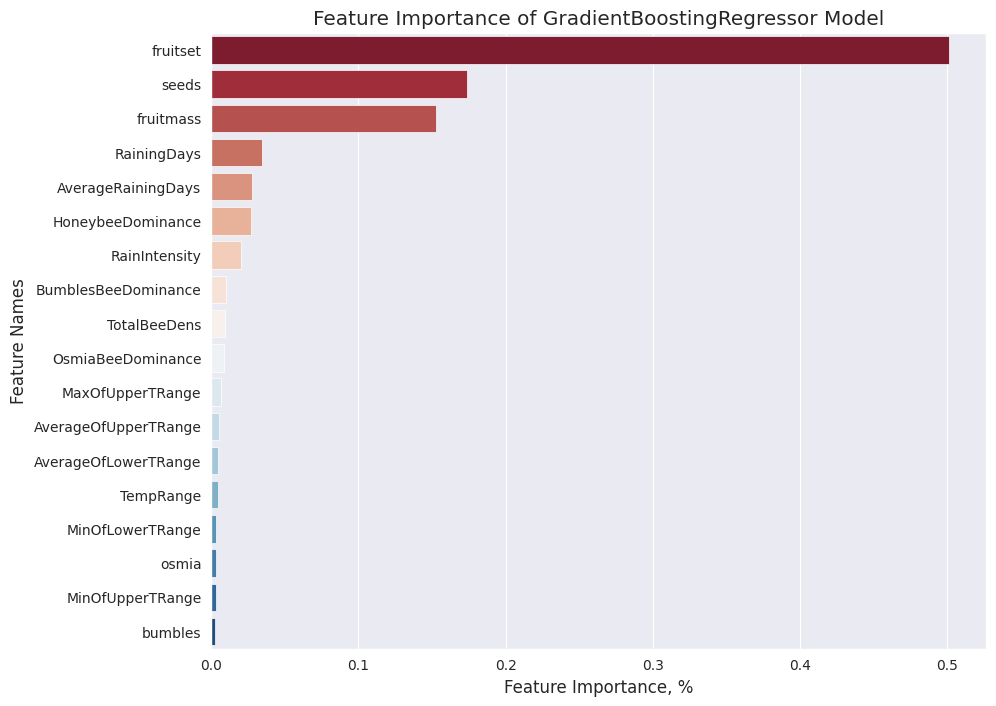

In [ ]:
plot_important_features(best_reg1.feature_importances_, X.columns, 'CatboostRegression')
plot_important_features(best_reg2.feature_importances_, X.columns, 'LightGBRegression')
plot_important_features(best_reg3.feature_importances_, X.columns, 'XGBRegression')
plot_important_features(best_reg4.feature_importances_, X.columns, 'GradientBoostingRegressor')

# Stacking

In [ ]:
estimators = [
    ('p_catboost', best_reg1),
    ('p_lgbm', best_reg2),
]

In [ ]:
stack_regressor = StackingRegressor(estimators=estimators, 
                                          final_estimator=LADRegression(alpha=0.001))

In [ ]:
stack_regressor

StackingRegressor(estimators=[('p_catboost',
                               <catboost.core.CatBoostRegressor object at 0x7f1fa7643670>),
                              ('p_lgbm',
                               LGBMRegressor(colsample_bytree=0.7,
                                             force_col_wise=True, max_depth=6,
                                             min_child_weight=20,
                                             n_estimators=1500, num_leaves=20,
                                             objective='mae', reg_alpha=0.3,
                                             reg_lambda=0.3, subsample=0.5))],
                  final_estimator=LADRegression(alpha=0.001))

In [ ]:
stack_regressor_model = stack_regressor.fit(X_train, y_train)

In [ ]:
prediction_val_stack_model = stack_regressor_model.predict(X_val)
show_metrics(y_val, prediction_val_stack_model, 'Stacking Regressor', 'Validation Data')

Validation Data
The accuracy of the Stacking Regressor by R2 is 83.0%
MAE of the Stacking Regressor is 332.98
RMSE of the Stacking Regressor is 18.25


In [ ]:
prediction_test_stack_model = stack_regressor_model.predict(X_test)
show_metrics(y_test, prediction_test_stack_model, 'Stacking Regressor', 'Test Data')

Test Data
The accuracy of the Stacking Regressor by R2 is 82.0%
MAE of the Stacking Regressor is 346.48
RMSE of the Stacking Regressor is 18.61


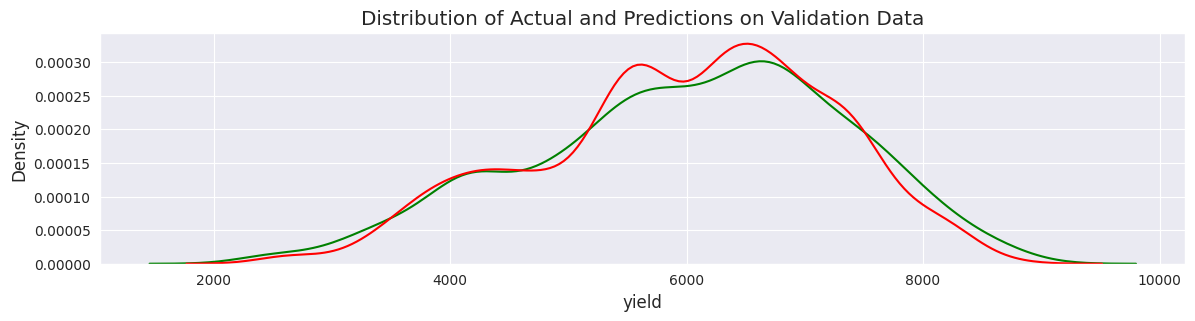

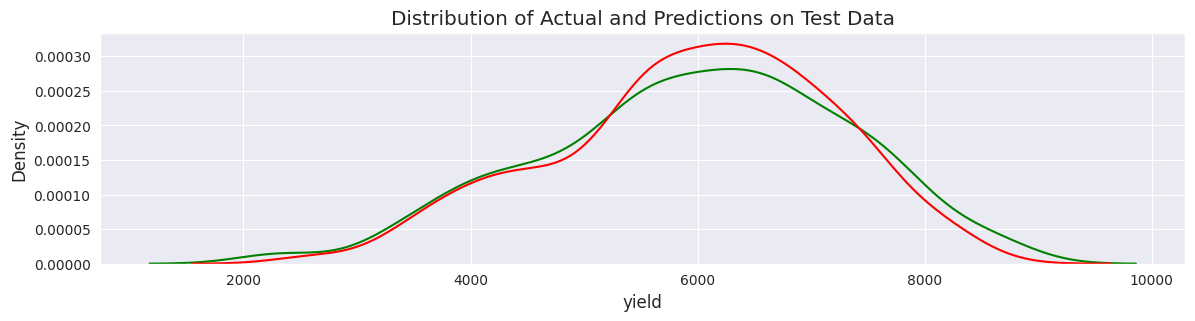

In [ ]:
show_distribution_y_pred(y_val, prediction_val_stack_model, 'Distribution of Actual and Predictions on Validation Data')
show_distribution_y_pred(y_test, prediction_test_stack_model, 'Distribution of Actual and Predictions on Test Data')